In [1]:
import tilemapbase as tmb
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
import numpy as np
import itertools as it
tmb.init(create=True)
%matplotlib inline

/usr/local/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/usr/local/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/usr/local/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful o

## 描画に使う関数

In [2]:
def get_extent(center, width):
    lng, lat = center
    min_lat, min_lng = lat - width, lng - width
    max_lat, max_lng = lat + width, lng + width
    return tmb.Extent.from_lonlat(
        min_lng, max_lng,
        min_lat, max_lat
    )

In [3]:
def get_data(center, width, n=20):
    lng0, lat0 = center
    lats = np.linspace(lat0 - width, lat0 + width, n)
    lngs = np.linspace(lng0 - width, lng0 + width, n)
    mat = np.array([np.sqrt((x-lng0)**2 + (y-lat0)**2) for x, y in it.product(lngs, lats)]).reshape(n,n).T
    return lngs, lats, mat * 1000 * 30

In [4]:
def project(lngs, lats):
    xs = [tmb.project(lng, lats[0])[0] for lng in lngs]
    ys = [tmb.project(lngs[0], lat)[1] for lat in lats]
    return xs, ys

In [5]:
def get_cmap(name="jet", ran=(0, 120)):
    cmap = cm.get_cmap(name)
    norm = Normalize(*ran)
    mappable = ScalarMappable(cmap=cmap, norm=norm)    
    return cmap, norm, mappable

## 描画してみる

(<Figure size 800x800 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x120d2d150>)

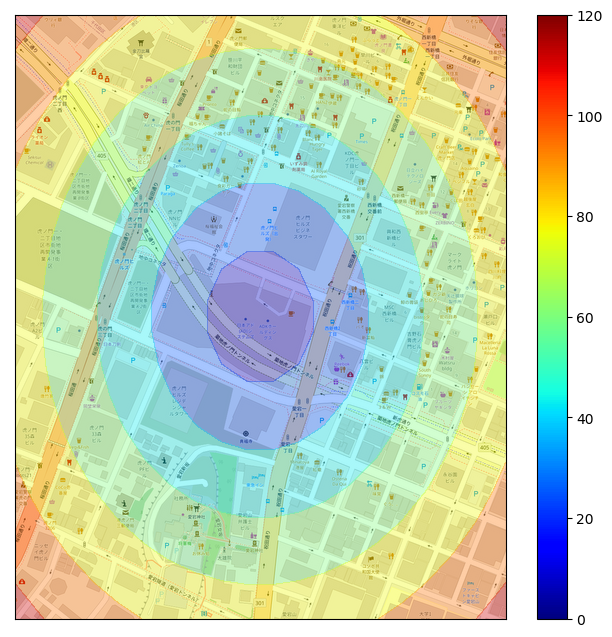

In [8]:
def doit():
    ## constants
    center = (139.74947495, 35.66687568)
    width = 0.003


    ## colormap
    cmap, norm, mble = get_cmap()

    ## prepare plot
    fig, ax = plt.subplots(figsize=(8, 8), dpi=100)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

    ## prepare grid, matrix
    lngs, lats, mat = get_data(center, width)
    xs, ys = project(lngs, lats)

    ## tilemapbase
    tile = tmb.tiles.build_OSM()
    extent = get_extent(center, width)
    plotter = tmb.Plotter(extent, tile, width=600)
    plotter.plot(ax, tile)

    ## contour, colorbar
    ax.contourf(
        xs, ys, mat, alpha=0.35, cmap=cmap
    )
    fig.colorbar(mble)

    return fig, ax
doit()

👆 地図とカラーバーの高さは同じ